In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
from pandas_datareader.data import DataReader
from datetime import datetime

C:\Users\Dell\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# US recession periods
usrec = DataReader('USREC', 'fred', start=datetime(1999, 1, 29), end=datetime(2017, 8, 31))

In [5]:
# Korea -- data is the first difference of the return of MSCI Korea index
Korea = pd.read_excel('Korea.xlsx')
Korea.set_index(Korea['Date'], inplace=True)
Korea.set_index('Date', inplace=True)
dateparse = lambda data: pd.to_datetime(data, format='%m%d%Y')


# China -- data is the first difference of the return of MSCI China index
china = pd.read_excel('China.xlsx')
china.set_index(china['Index'], inplace=True)
china.set_index('Index', inplace=True)
dateparse = lambda china: pd.to_datetime(china, format='%m%d%Y')

In [6]:
print Korea.head()
print china.head()

                  C
Date               
2/26/1999 -0.159573
3/31/1999  0.270392
4/30/1999  0.066698
5/28/1999 -0.212487
6/30/1999  0.234716
                  A
Index              
1/29/1999 -0.228304
2/26/1999 -0.044277
3/31/1999  0.113653
4/30/1999  0.199832
5/28/1999 -0.055206


In [8]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test for stationarity:

def test_stationarity(timeseries):        
    
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [9]:
test_stationarity(Korea["C"])
test_stationarity(china["A"])

Results of Dickey-Fuller Test:
Test Statistic                -8.702686e+00
p-value                        3.771910e-14
#Lags Used                     7.000000e+00
Number of Observations Used    2.150000e+02
Critical Value (5%)           -2.875079e+00
Critical Value (1%)           -3.461136e+00
Critical Value (10%)          -2.573986e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.354254e+01
p-value                        2.497148e-25
#Lags Used                     0.000000e+00
Number of Observations Used    2.230000e+02
Critical Value (5%)           -2.874590e+00
Critical Value (1%)           -3.460019e+00
Critical Value (10%)          -2.573725e+00
dtype: float64


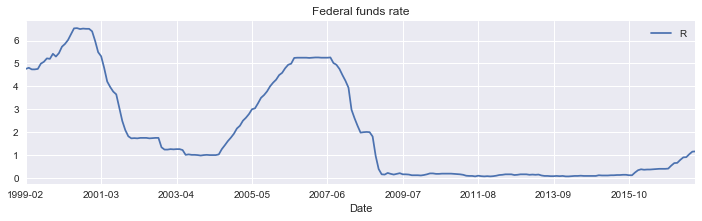

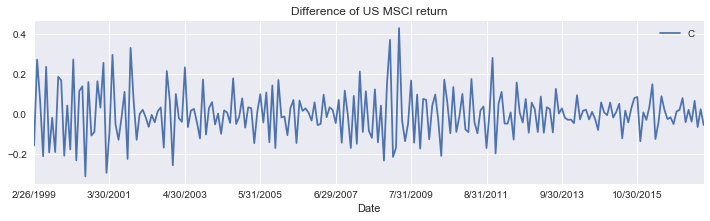

In [10]:
# Get the federal funds rate data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds
fed = pd.read_excel('Fed.xlsx')
fed.set_index(fed['Date'], inplace=True)
fed.set_index('Date', inplace=True)

# Plot the data
fed.plot(title='Federal funds rate', figsize=(12,3))
Korea.plot(title="Difference of Korea MSCI return" , figsize=(12,3))


In [18]:
#Model I for Korea without any switching component
mod1_Korea = sm.tsa.MarkovAutoregression(Korea["C"], k_regimes=2, order=3, switching_ar=False)
res1_Korea = mod1_Korea.fit()
print (res1_Korea.summary())

#Model I for China without any switching component
mod1_China = sm.tsa.MarkovAutoregression(china, k_regimes=2, order=3, switching_ar=False)
res1_China = mod1_China.fit()
print (res1_China.summary())

                         Markov Switching Model Results                         
Dep. Variable:                        C   No. Observations:                  220
Model:             MarkovAutoregression   Log Likelihood                 210.124
Date:                  Sun, 31 Dec 2017   AIC                           -404.247
Time:                          02:21:29   BIC                           -377.098
Sample:                      05-28-1999   HQIC                          -393.284
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.014     -0.032      0.974      -0.028       0.027
                             Regime 

In [19]:
#Model II for Korea without any switching component
mod2_Korea = sm.tsa.MarkovAutoregression(Korea["C"], k_regimes=2, order=3, switching_ar=True)
res2_Korea = mod2_Korea.fit()
print (res2_Korea.summary())

#Model II for China without any switching component
mod2_China = sm.tsa.MarkovAutoregression(china, k_regimes=2, order=3, switching_ar=True)
res2_China = mod2_China.fit()
print (res2_China.summary())

                         Markov Switching Model Results                         
Dep. Variable:                        C   No. Observations:                  220
Model:             MarkovAutoregression   Log Likelihood                 221.197
Date:                  Sun, 31 Dec 2017   AIC                           -420.394
Time:                          02:26:06   BIC                           -383.064
Sample:                      05-28-1999   HQIC                          -405.319
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0106      0.007     -1.536      0.125      -0.024       0.003
ar.L1         -0.8362      0.095    

In [24]:
# Model III for Korea with switching AR and variance terms
mod3_Korea = sm.tsa.MarkovAutoregression(Korea, k_regimes=2, order=3, switching_ar=True, switching_variance=True)
res3_Korea = mod3_Korea.fit()
print (res3_Korea.summary())

# Model III for China with switching AR and variance terms
mod3_China = sm.tsa.MarkovAutoregression(china, k_regimes=2, order=3, switching_ar=True, switching_variance=True)
res3_China = mod3_China.fit()
print (res3_China.summary())

                         Markov Switching Model Results                         
Dep. Variable:                        C   No. Observations:                  220
Model:             MarkovAutoregression   Log Likelihood                 228.921
Date:                  Sun, 31 Dec 2017   AIC                           -433.842
Time:                          02:28:54   BIC                           -393.118
Sample:                      05-28-1999   HQIC                          -417.396
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0203      0.007      3.051      0.002       0.007       0.033
sigma2         0.0010      0.000    

In [26]:
# downloading parapeters
Korea_parameters=res3_Korea.params
China_parameters=res3_China.params

In [27]:
writer = pd.ExcelWriter('params_em.xlsx', engine='xlsxwriter')
   
Korea_parameters.to_excel(writer, 'Sheet1')
China_parameters.to_excel(writer, 'Sheet2')

writer.save()

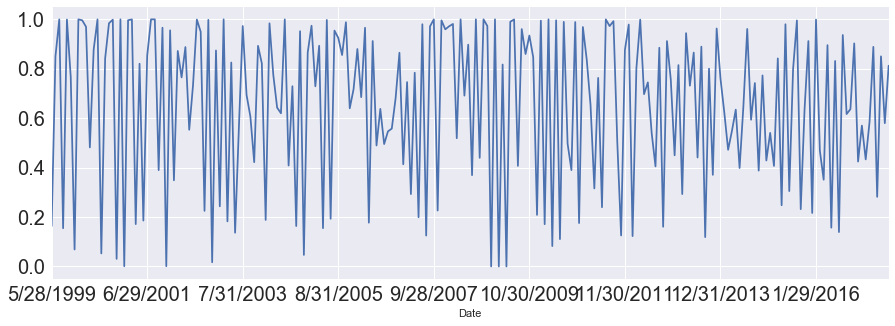

In [32]:
# smoothed probabilities for each country
res3_Korea.smoothed_marginal_probabilities[1].plot(figsize=(15,5), fontsize=20)

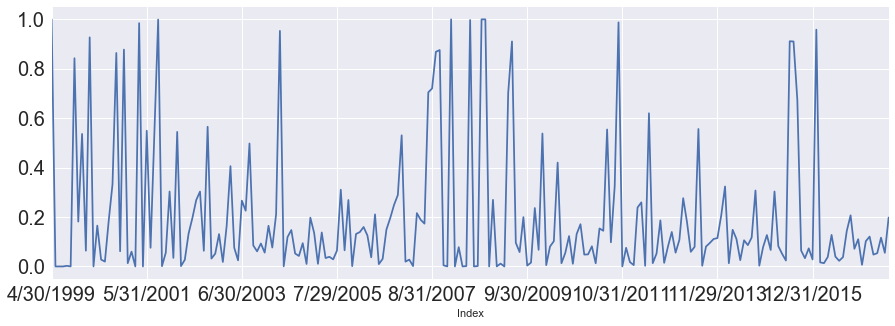

In [33]:
res3_China.smoothed_marginal_probabilities[1].plot(figsize=(15,5), fontsize=20)

In [43]:
state0inKorea=res3_Korea.smoothed_marginal_probabilities[0]
state0inChina=res3_China.smoothed_marginal_probabilities[0]

print state0inKorea.tail(1)
print state0inChina.tail(1)

Date
8/31/2017    0.187612
Name: 0, dtype: float64
Index
8/31/2017    0.802088
Name: 0, dtype: float64


In [42]:
# Model IV for Korea with conditional information
mod4_Korea = sm.tsa.MarkovAutoregression(
    Korea.ix[2:, 'C'], k_regimes=2, order=5, switching_ar= True, switching_variance=True,
    exog_tvtp=sm.add_constant(fed.ix[1:-1,'R']))
res4_Korea=mod4_Korea.fit()
print(res4_Korea.summary())

C:\Users\Dell\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                         Markov Switching Model Results                         
Dep. Variable:                        C   No. Observations:                  216
Model:             MarkovAutoregression   Log Likelihood                 234.914
Date:                  Sun, 31 Dec 2017   AIC                           -433.828
Time:                          02:37:34   BIC                           -373.073
Sample:                      09-30-1999   HQIC                          -409.283
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.003      0.145      0.884      -0.005       0.006
sigma2         0.0011      0.000    